# Lecture 4 : Solving linear systems

*May, 2022 - François HU*

*Master of Science - EPITA*

*This lecture is available here: https://curiousml.github.io/*

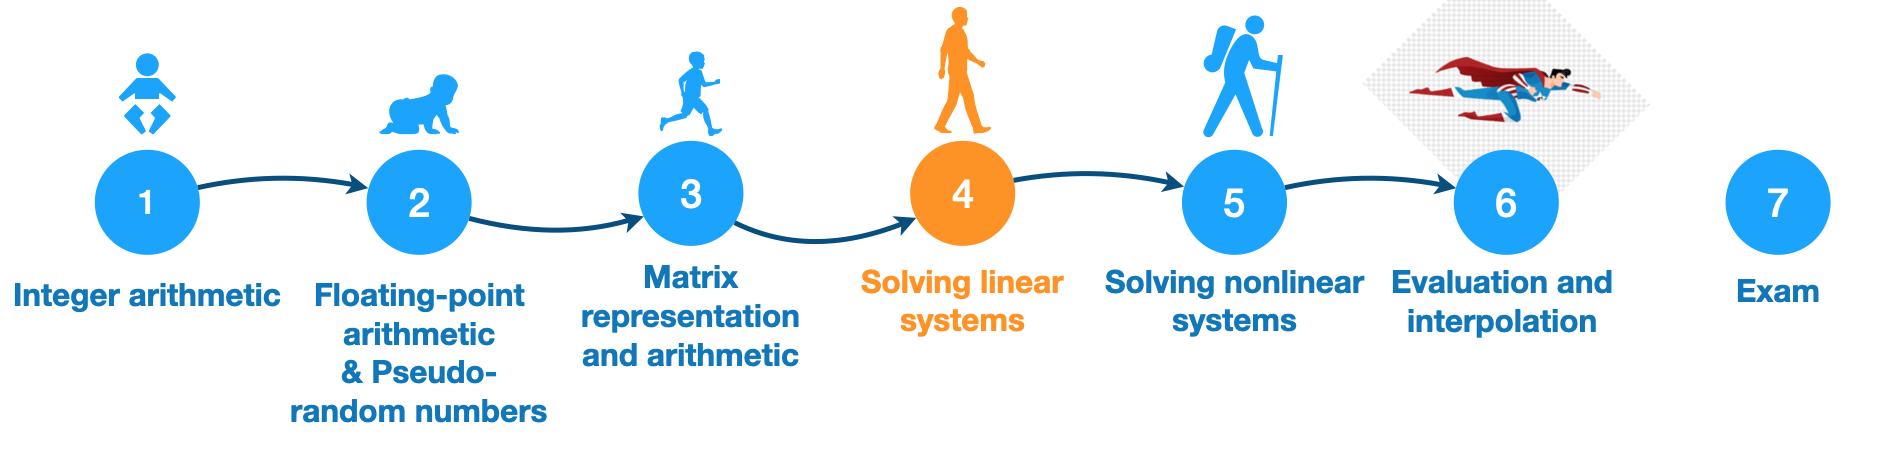

# Table of contents

1. [Objective](#1)

2. [Direct method: Cramer's rule](#2)

3. [Triangular matrix](#3)

4. [Gauss method: triangularisation of the system](#4)

5. [Exercices](#E)
    - [Exercice 1](#E1): `res_triangle_rec` algorithm + complexity
    - [Exercice 2](#E2): `res_triangle_it` algorithm
    - [Exercice 3](#E3): `naive_gauss` algorithm + complexity
    - [Exercice 4](#E4): `improved_gauss` algorithm
    - [Exercice 5](#E5): `conditioning` algorithm

## 1. Objective <a name="1"></a>

We want to solve the system:
$$
\begin{cases}
   a_{0,0}x_0 + a_{0,1}x_1  + \cdots + a_{0,n-1}x_{n-1} & = & b_0\\
   a_{1,0}x_0 + a_{1,1}x_1  + \cdots + a_{1,n-1}x_{n-1} & = & b_1\\
    & \vdots &  \\
   a_{n-1,0}x_0 + a_{n-1,1}x_1  + \cdots + a_{n-1,n-1}x_{n-1} & = & b_{n-1}
\end{cases}
$$

This can be translated into :
$$
\begin{bmatrix}
   a_{0,0}  & a_{0,1} & \cdots & a_{0,n-1} \\
   a_{1,0}  & a_{1,1} & \cdots & a_{1,n-1} \\
    & \vdots & \\
   a_{n-1,0} & a_{n-1,1} & \cdots & a_{n-1,n-1}
\end{bmatrix} \times \begin{bmatrix}
x_0\\
x_1\\
\vdots\\
x_{n-1}
\end{bmatrix} = \begin{bmatrix}
b_0\\
b_1\\
\vdots\\
b_{n-1}
\end{bmatrix}
$$

## 2. Direct method: Cramer's rule <a name="2"></a>

We can use Cramer's formulas
$$
x_i = \dfrac{\textrm{det}(B_i)}{\textrm{det}(A)}
$$

with
$$
B_i = \begin{bmatrix}
   a_{0,0}  & \cdots & a_{0,i-1} & b_0 & a_{0,i+1} & \cdots & a_{0,n-1} \\
   a_{1,0}  & \cdots & a_{1,i-1} & b_1 & a_{1,i+1} & \cdots & a_{1,n-1} \\
    &  &  & \vdots & \\
   a_{n-1,0} & \cdots & a_{n-1,i-1} & b_{n-1} & a_{n-1,i+1}& \cdots & a_{n-1,n-1}
\end{bmatrix}
$$

This method is **very costly**, as the calculation of a determinant by the co-factors is in $O(n!)$

## 3. Special case: triangular matrix <a name="3"></a>

If our system is of the form:

$$
\begin{bmatrix}
   a_{0,0}  & a_{0,1} & \cdots & a_{0,n-1} \\
   0  & a_{1,1} & \cdots & a_{1,n-1} \\
    & \vdots & \\
   0 & 0 & \cdots & a_{n-1,n-1}
\end{bmatrix} \times \begin{bmatrix}
x_0\\
x_1\\
\vdots\\
x_{n-1}
\end{bmatrix} = \begin{bmatrix}
b_0\\
b_1\\
\vdots\\
b_{n-1}
\end{bmatrix}
$$

and if $a_{n-1,n-1} \neq 0$ then $x_{n-1} = \dfrac{b_{n-1}}{a_{n-1,n-1}}$

The system can therefore be reduced to $n-1$ equations:

$$
\begin{bmatrix}
   a_{0,0}  & a_{0,1} & \cdots & a_{0,n-2} \\
   0  & a_{1,1} & \cdots & a_{1,n-2} \\
    & \vdots & \\
   0 & 0 & \cdots & a_{n-2,n-2}
\end{bmatrix} \times \begin{bmatrix}
x_0\\
x_1\\
\vdots\\
x_{n-2}
\end{bmatrix} = \begin{bmatrix}
b_0 - a_{0, n-1}x_{n-1}\\
b_1 - a_{1, n-1}x_{n-1}\\
\vdots\\
b_{n-2} - a_{n-2, n-1}x_{n-1}
\end{bmatrix} = \begin{bmatrix}
b_0'\\
b_1'\\
\vdots\\
b_{n-2}'
\end{bmatrix}
$$

In the same way as before we calculate $x_{n-2} = \dfrac{b_{n-2}`}{a_{n-2,n-2}}$ for $a_{n-2,n-2} \neq 0$.

**Remarks:**

- **This recursive approach requires that the diagonal terms are non-zero**

- The triangularisation algorithm has no effect on an upper triangular matrix.

### Pseudo-code

```
res_triangle_rec(A, b)
    Input : A a n x n upper triangular matrix, b a vector of size n
    Output : the system solution X
    
    if n=1 then X = b/A
    else
        x = b[n-1]/A[n-1, n-1]
        A' = reduce_matrix(A, n-1)
        b' = b - A[..,n-1] * x
        X = [res_triangle_rec(A', b'), x]
    return X
    
```

```

res_triangle_it(A, b)
    Input : A a n x n upper triangular matrix, b a vector of size n
    Output : the system solution b and the identity matrix A
    
    for i=n-1 to 0 do
        b[i] = b[i]/A[i, i]
        if i>0 then
            for j=i-1 to 0 do
                b[j] = b[j] - b[i]*A[j,i]
                A[j,i] = 0
        A[i,i] = 1
    return A and b
```

## 4. Gauss method: triangularisation of the system <a name="4"></a>

- The idea is to make a linear combination of the lines of our system to arrive at a triangular matrix.


- Once the triangular matrix is obtained, we apply the previous resolution.


- Here, however, the importance of the choice of the pivot line affects the quality, and may therefore require a reorganisation of the lines.

### Pseudo-code

```
naive_gauss(A, b)
    Input : A a n x n matrix, b a vector of size n
    Output : A triangularised and b modified
    
    for i=0 to n-1 do
        for j=i+1 to n-1 do
            b[j] = b[j] - (A[j,i]/A[i,i]) * b[i]
            A[j,i..n-1] = A[j,i..n-1] - (A[j,i]/A[i,i]) * A[i,i..n-1]
    Return A and b
```

**Remarks:** This algorithm only works under the condition that the pivot $a_{i,i}$ is non zero.

- (**Improved version**) It must therefore be checked during the algorithm.

- This is done by swapping with a line not yet taken into account as a pivot, so as to have a non-zero pivot.

- If this is not possible then the system has no unique solution.

## 5. Exercices <a name="E"></a>

### Exercice 1: triangular matrix 1<a name="E1"></a>

1. Define a function `res_triangle_rec(A, b)` that recursively solves the linear system given a triangular matrix $A$ (see pseudo-code).

2. Compute (theoretically) the complexity of this algorithm.

### Exercice 2: triangular matrix 2<a name="E2"></a>

Define a function `res_triangle_it(A, b)` that iteratively solves the linear system given a triangular matrix $A$ (see pseudo-code).

### Exercice 3: Gauss method 1<a name="E3"></a>

1. Define the function `naive_gauss` that solves the linear system using the gauss method *without reorganisation* (see pseudo-code).

2. Compute the complexity of this algorithm.

### Exercice 4: Gauss method 2<a name="E4"></a>

Define the function `improved_gauss` that solves the linear system using the gauss method *with reorganisation* (see lecture).

### Exercice 5: Conditioning<a name="E5"></a>

1. Let us consider:
$$
A = \begin{bmatrix}
10 & 7 & 8 & 7\\
7 & 5 & 6 & 5\\
8 & 6 & 10 & 9\\
7 & 5 & 9 & 10\\
\end{bmatrix}, \quad b = \begin{bmatrix}
32\\
23\\
33\\
31\\
\end{bmatrix}
$$
- Solve it manually.
- Write a script that solves numerically this system.

2. Let us now consider:
$$
A = \begin{bmatrix}
10 & 7 & 8 & 7\\
7 & 5 & 6 & 5\\
8 & 6 & 10 & 9\\
7 & 5 & 9 & 10\\
\end{bmatrix}, \quad b = \begin{bmatrix}
32.1\\
22.9\\
33.1\\
30.9\\
\end{bmatrix}
$$
- Write a script that solves numerically this system. 
- Comment on this result.

3. How do we measure this phenomenon ? (Hint: see for example [conditioning](https://en.wikipedia.org/wiki/Condition_number)). Implement your methodology.

In [6]:
import numpy as np

A = np.array(
[
    [10, 7, 8, 7],
    [7, 5, 6, 5],
    [8, 6, 10, 9],
    [7, 5, 9, 10]
])

print(np.linalg.norm(A))
print(np.linalg.norm(np.linalg.inv(A)))

np.linalg.norm(A)*np.linalg.norm(np.linalg.inv(A))

30.54504869860253
98.5291834940301


3009.578708058694